In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt

In [ ]:
url = 'https://www.amazon.in/gp/bestsellers/books'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://www.amazon.in',
    'Connection': 'keep-alive'
}

page = requests.get(url, headers=headers)
page

<Response [200]>

In [ ]:
soup = bs(page.content, 'html.parser')

In [ ]:
Books = soup.find_all('div',class_='_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y')

name_of_books = []
author=[]

for i in range(len(Books)):
  if i%2==0:
    name_of_books.append(Books[i].text.strip())
  else:
      author.append(Books[i].text.strip())

print("Name_of_Books ",name_of_books)
print("Authors: ",author)

Name_of_Books  ['Educart PRAYAS CBSE Class 10 Chapterwise Most Important Qs (& PYQs) - Maths, Science, SST and English for February 2025 Boards', 'Too Good to Be True : A smart, funny will-they-won’t-they romance', 'Lena Voss', 'Oswaal Editorial Board', 'Educart', 'Wonder House Books', 'Morgan Housel', 'Thibaut Meurisse', 'James Clear', 'Joseph Nguyen', 'Ravi Mantri', 'Renuka Gavrani', 'Fyodor Dostoyevsky', 'Wonder House Books', 'Saleem Ahmed', 'Subah Saraf', 'Francesc García, Héctor,Miralles', 'Physics Wallah (PW)', 'Prashant Kirad', 'Wonder House Books', 'Brianna Wiest', 'Nick Trenton', 'Dale Carnegie', 'Joseph Murphy', 'Maple Press', 'A. C. Bhaktivedanta Swami Prabhupad', 'Rupesh Thakur', 'A.C. Bhaktivendanta Swami Prabhupada', 'M Laxmikanth', 'Robert T. Kiyosaki']
Authors:  ['Prashant Kirad', 'Prajakta Koli', 'Oswaal CBSE 25 Combined Sample Question papers Class 10 Books Science Mathematics Standard Social Science English Language and Literature Hindi-A (For 2025 Exam)', 'Educart P

In [ ]:
len(name_of_books)

30

In [ ]:
len(author)

29

In [ ]:
# Scrape prices correctly
Book_Price = soup.find_all('span', class_='_cDEzb_p13n-sc-price_3mJ9Z')
Price = []

for price in Book_Price:
    Price.append(price.text.strip())

print("Prices:", Price)
len(Price)

Prices: ['₹489.00', '₹267.00', '₹1,514.00', '₹406.00', '₹499.00', '₹399.00', '₹316.00', '₹199.00', '₹460.00', '₹164.00', '₹220.00', '₹189.00', '₹124.00', '₹129.00', '₹439.00', '₹308.00', '₹322.00', '₹594.00', '₹494.00', '₹199.00', '₹245.00', '₹159.00', '₹349.00', '₹148.00', '₹227.00', '₹296.00', '₹70.00', '₹220.00', '₹775.00', '₹350.00']


30

In [ ]:
ratings = soup.find_all('a', class_='a-link-normal', title=True)
customer_ratings = []
for a in ratings:
    if 'out of 5 stars' in a['title']:
        customer_ratings.append(a['title'])

print("Customer Ratings:",customer_ratings)
len(customer_ratings)

Customer Ratings: ['4.6 out of 5 stars, 40 ratings', '4.7 out of 5 stars, 205 ratings', '4.7 out of 5 stars, 165 ratings', '5.0 out of 5 stars, 3 ratings', '4.5 out of 5 stars, 81,492 ratings', '4.6 out of 5 stars, 69,437 ratings', '4.4 out of 5 stars, 12,606 ratings', '4.6 out of 5 stars, 100,531 ratings', '4.5 out of 5 stars, 9,293 ratings', '4.7 out of 5 stars, 1,387 ratings', '4.4 out of 5 stars, 2,333 ratings', '4.5 out of 5 stars, 1,712 ratings', '4.4 out of 5 stars, 29,295 ratings', '5.0 out of 5 stars, 3 ratings', '4.8 out of 5 stars, 1,117 ratings', '4.6 out of 5 stars, 57,110 ratings', '4.8 out of 5 stars, 57 ratings', '4.6 out of 5 stars, 59 ratings', '4.5 out of 5 stars, 6,179 ratings', '4.4 out of 5 stars, 20,974 ratings', '4.4 out of 5 stars, 70 ratings', '4.5 out of 5 stars, 26,479 ratings', '4.5 out of 5 stars, 50,072 ratings', '4.5 out of 5 stars, 3,347 ratings', '4.8 out of 5 stars, 7,406 ratings', '4.5 out of 5 stars, 576 ratings', '4.8 out of 5 stars, 20,606 ratings

29

In [ ]:
Price = Price[:29]
customer_ratings=customer_ratings[:29]
name_of_books = name_of_books[:29]
author=author[:29]

In [ ]:
data = {
        'name_of_books' : name_of_books,
        'author' : author,
        'customer_ratings' : customer_ratings,
        'Price' : Price
}

In [ ]:
df=pd.DataFrame(data)
df

,name_of_books,author,customer_ratings,Price
0,Educart PRAYAS CBSE Class 10 Chapterwise Most ...,Prashant Kirad,"4.6 out of 5 stars, 40 ratings",₹489.00
1,"Too Good to Be True : A smart, funny will-they...",Prajakta Koli,"4.7 out of 5 stars, 205 ratings",₹267.00
2,Lena Voss,Oswaal CBSE 25 Combined Sample Question papers...,"4.7 out of 5 stars, 165 ratings","₹1,514.00"
3,Oswaal Editorial Board,Educart PRAYAS CBSE Class 12 Chapterwise Most ...,"5.0 out of 5 stars, 3 ratings",₹406.00
4,Educart,My First Library: Boxset of 10 Board Books for...,"4.5 out of 5 stars, 81,492 ratings",₹499.00
5,Wonder House Books,The Psychology of Money [Paperback] Morgan Housel,"4.6 out of 5 stars, 69,437 ratings",₹399.00
6,Morgan Housel,Dopamine Detox : A Short Guide to Remove Distr...,"4.4 out of 5 stars, 12,606 ratings",₹316.00
7,Thibaut Meurisse,Atomic Habits,"4.6 out of 5 stars, 100,531 ratings",₹199.00
8,James Clear,Don't Believe Everything You Think (English),"4.5 out of 5 stars, 9,293 ratings",₹460.00
9,Joseph Nguyen,Amma Diarylo Konni Pageelu,"4.7 out of 5 stars, 1,387 ratings",₹164.00


In [ ]:
#Cleaning and preprocessing

#Clean customer ratings
df['customer_ratings'] = df['customer_ratings'].astype(str).str.split(' ').str[0].astype(float)

# Clean the price
df['Price'] = df['Price'].astype(str).replace({'₹': '', ',': ''}, regex=True).astype(float)

df

,name_of_books,author,customer_ratings,Price
0,Educart PRAYAS CBSE Class 10 Chapterwise Most ...,Prashant Kirad,4.6,489.0
1,"Too Good to Be True : A smart, funny will-they...",Prajakta Koli,4.7,267.0
2,Lena Voss,Oswaal CBSE 25 Combined Sample Question papers...,4.7,1514.0
3,Oswaal Editorial Board,Educart PRAYAS CBSE Class 12 Chapterwise Most ...,5.0,406.0
4,Educart,My First Library: Boxset of 10 Board Books for...,4.5,499.0
5,Wonder House Books,The Psychology of Money [Paperback] Morgan Housel,4.6,399.0
6,Morgan Housel,Dopamine Detox : A Short Guide to Remove Distr...,4.4,316.0
7,Thibaut Meurisse,Atomic Habits,4.6,199.0
8,James Clear,Don't Believe Everything You Think (English),4.5,460.0
9,Joseph Nguyen,Amma Diarylo Konni Pageelu,4.7,164.0


In [63]:
# Summary Statistics
average_rating = df['customer_ratings'].mean()
average_price = df['Price'].mean()

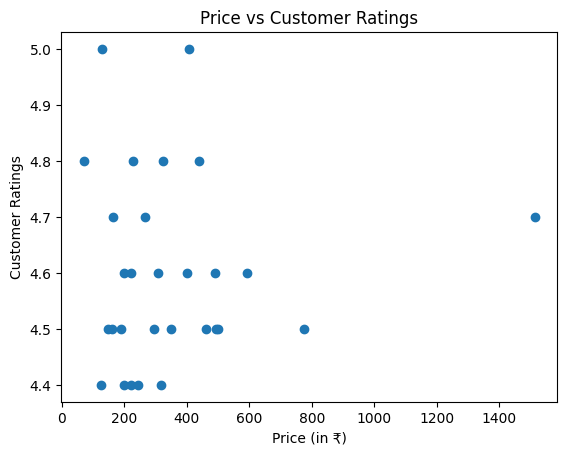

In [ ]:
# Price vs Rating Scatter Plot
plt.scatter(df['Price'], df['customer_ratings'])
plt.title('Price vs Customer Ratings')
plt.xlabel('Price (in ₹)')
plt.ylabel('Customer Ratings')
plt.show()

In [62]:
# Output results
print(f"Average Rating: {average_rating}")
print(f"Average Price: {average_price}")

Average Rating: 4.6
Average Price: 352.41379310344826


In [ ]:
df.to_csv("Amazon's most selling Books.csv",index=False)